In [123]:
import sys
sys.path.append('../../../')
import helper

from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [124]:
def f(x, w):
    return_value = np.sin(w[0] * x + w[1])
    return return_value

f_label = 'sin(w[0]x + w[1])'

density = 8000
dots_count = 1000
radius = 0.1
dist = 2.5
weights = np.array([2, 3], dtype=float)
test_count = 10

X = np.linspace(-dist, dist, density)
Y = np.array([f(x, weights) for x in X])

datasets = [0] * test_count

for k in tqdm(range(test_count)):
    datasets[k] = helper.generate_full_dataset(X, Y, dots_count, radius)


100%|██████████| 10/10 [00:16<00:00,  1.66s/it]


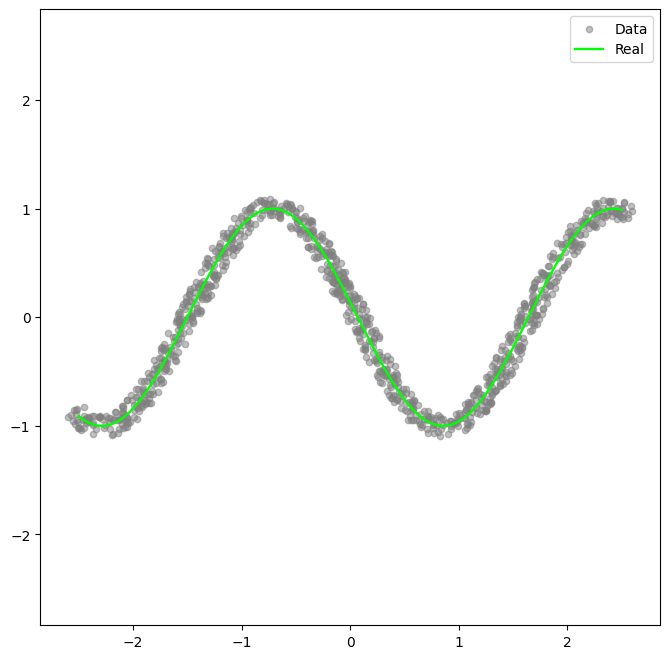

In [125]:
helper.print_generated(X, Y, datasets[0])

In [128]:
filename = ''
filename += f_label + ' ' 
filename += "weights=" + str(weights) + ' '
filename += 'density=' + str(density) + ' ' 
filename += 'dots_count=' + str(dots_count) + ' '
filename += 'radius=' + str(radius) + ' '
filename += 'dist=' + str(dist) + ' '
# filename += 'init_dist_x=' + str(init_dist_x) + ' '
# filename += 'init_dist_y=' + str(init_dist_y) + ' '
# filename += 'init_density_x=' + str(init_density_x) + ' '
# filename += 'init_density_y=' + str(init_density_y) + ' '
filename += 'test_count=' + str(test_count)
filename += '.txt'

In [129]:
helper.save_datasets(X, Y, datasets, filename)